
**Salary dataset**



In [1]:
# We are given with the salary dataset.
# We need to perform SVM technique to find the best model for this dataset.

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# Loading Training Dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [5]:
# Loading Test Dataset

In [6]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [7]:
# Reading the data

In [8]:
train_temp = pd.read_csv('SalaryData_Train(1).csv')

In [9]:
test_temp = pd.read_csv('SalaryData_Test(1).csv')

In [10]:
train_temp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
test_temp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


TRAIN DATASET

In [12]:
# Dropping all the duplicate values from the original dataset

In [13]:
train1 = train_temp.drop_duplicates()

In [14]:
train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
train = train1.drop(['capitalgain','capitalloss','relationship','maritalstatus','race'],axis=1)

In [16]:
train

,age,workclass,education,educationno,occupation,sex,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Adm-clerical,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,Male,40,United-States,<=50K
3,53,Private,11th,7,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Prof-specialty,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Exec-managerial,Male,40,United-States,>50K
30155,22,Private,Some-college,10,Protective-serv,Male,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Tech-support,Female,38,United-States,<=50K
30158,58,Private,HS-grad,9,Adm-clerical,Female,40,United-States,<=50K


In [17]:
# Basic information of the dataset

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           26903 non-null  int64 
 1   workclass     26903 non-null  object
 2   education     26903 non-null  object
 3   educationno   26903 non-null  int64 
 4   occupation    26903 non-null  object
 5   sex           26903 non-null  object
 6   hoursperweek  26903 non-null  int64 
 7   native        26903 non-null  object
 8   Salary        26903 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


In [19]:
# Checking the null values

In [20]:
train.isnull().sum()

age             0
workclass       0
education       0
educationno     0
occupation      0
sex             0
hoursperweek    0
native          0
Salary          0
dtype: int64

No Null values in the dataset.Proceeding further

In [21]:
# Shape of the dataset.

In [22]:
train.shape

(26903, 9)

In [23]:
# Plotting of the dataset

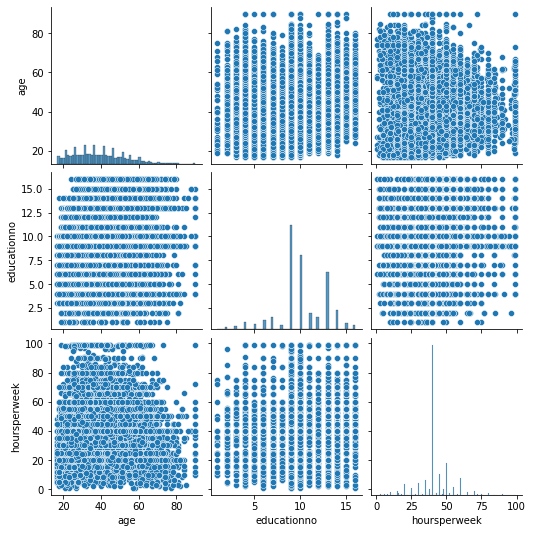

In [24]:
import seaborn as sns
sns.pairplot(train)

**Label Encoding**

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [26]:
train['workclass'] = labelencoder.fit_transform(train['workclass'])
train['education'] = labelencoder.fit_transform(train['education'])
train['occupation'] = labelencoder.fit_transform(train['occupation'])
train['sex'] = labelencoder.fit_transform(train['sex'])
train['native'] = labelencoder.fit_transform(train['native'])
train['Salary'] = labelencoder.fit_transform(train['Salary'])

In [27]:
train

,age,workclass,education,educationno,occupation,sex,hoursperweek,native,Salary
0,39,5,9,13,0,1,40,37,0
1,50,4,9,13,3,1,13,37,0
2,38,2,11,9,5,1,40,37,0
3,53,2,1,7,5,1,40,37,0
4,28,2,9,13,9,0,40,4,0
...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,3,1,40,37,1
30155,22,2,15,10,10,1,40,37,0
30156,27,2,7,12,12,0,38,37,0
30158,58,2,11,9,0,0,40,37,0


In [28]:
# Correlation of the train dataset

In [29]:
train.corr()

,age,workclass,education,educationno,occupation,sex,hoursperweek,native,Salary
age,1.000000,0.075184,0.002717,0.038048,-0.004570,0.070434,0.072529,0.010626,0.223502
workclass,0.075184,1.000000,0.021289,0.037806,0.014047,0.079380,0.047169,0.012683,0.016577
education,0.002717,0.021289,1.000000,0.359940,-0.025890,-0.029841,0.058709,0.076605,0.090094
educationno,0.038048,0.037806,0.359940,1.000000,0.084300,0.010941,0.145491,0.096279,0.332178
occupation,-0.004570,0.014047,-0.025890,0.084300,1.000000,0.066919,0.023073,0.003024,0.050711
sex,0.070434,0.079380,-0.029841,0.010941,0.066919,1.000000,0.228767,-0.004930,0.217360
hoursperweek,0.072529,0.047169,0.058709,0.145491,0.023073,0.228767,1.000000,0.014100,0.225812
native,0.010626,0.012683,0.076605,0.096279,0.003024,-0.004930,0.014100,1.000000,0.028547
Salary,0.223502,0.016577,0.090094,0.332178,0.050711,0.217360,0.225812,0.028547,1.000000


**VISUALIZATION**

BAR CHART

In [30]:
# Workclass

<Axes: >

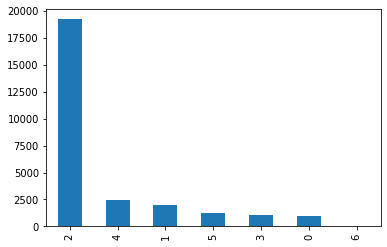

In [31]:
train['workclass'].value_counts().plot(kind='bar')

2 here indicates Private class.

Which says that there are more no of employees in the dataset who work for private companies.

In [32]:
# Age

<Axes: >

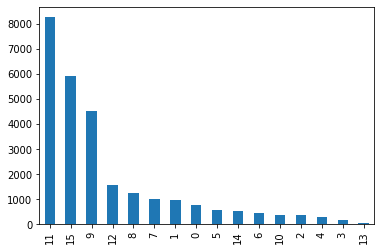

In [33]:
train['education'].value_counts().plot(kind='bar')

11 here indicates , most of the employees are HS graduates.

In [34]:
# sex

<Axes: >

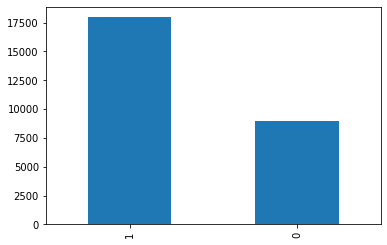

In [35]:
train['sex'].value_counts().plot(kind='bar')

1 indicates male and 0 indicates Female.

From the above Bar graph,we conclude that male get more salary than female.

In [36]:
# Occupation

<Axes: >

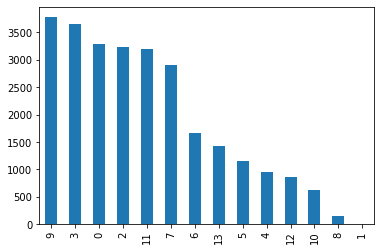

In [37]:
train['occupation'].value_counts().plot(kind='bar')

Prof-specialty has been the major occupation done by in the dataset.

In [38]:
# Salary

<Axes: >

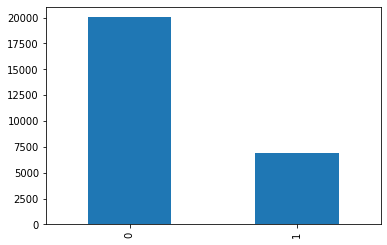

In [39]:
train['Salary'].value_counts().plot(kind='bar')

0 indicates that most of the employees have less than or equal to 50000 salary.

In [40]:
# Pie chart

In [41]:
# Occupation

<Axes: ylabel='occupation'>

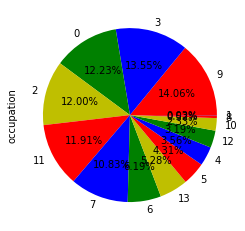

In [42]:
train['occupation'].value_counts().plot(kind='pie',autopct='%1.2f%%',colors=['r','b','g','y'])

9 here indicates that prof speciality are the most in this dataset.

**TEST DATASET**

In [43]:
# Dropping all duplicate values from the test dataset

In [44]:
test1 = test_temp.drop_duplicates()

In [45]:
test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [79]:
# Dropping capitalgain , capital loss columns,relationship,maritalstatus,race columns

In [47]:
test = test1.drop(['capitalgain','capitalloss','relationship','maritalstatus','race'],axis=1)

In [48]:
test

,age,workclass,education,educationno,occupation,sex,hoursperweek,native,Salary
0,25,Private,11th,7,Machine-op-inspct,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Farming-fishing,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Protective-serv,Male,40,United-States,>50K
3,44,Private,Some-college,10,Machine-op-inspct,Male,40,United-States,>50K
4,34,Private,10th,6,Other-service,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Prof-specialty,Male,40,United-States,<=50K
15056,39,Private,Bachelors,13,Prof-specialty,Female,36,United-States,<=50K
15057,38,Private,Bachelors,13,Prof-specialty,Male,50,United-States,<=50K
15058,44,Private,Bachelors,13,Adm-clerical,Male,40,United-States,<=50K


In [49]:
# Basic information of the dataset

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           14130 non-null  int64 
 1   workclass     14130 non-null  object
 2   education     14130 non-null  object
 3   educationno   14130 non-null  int64 
 4   occupation    14130 non-null  object
 5   sex           14130 non-null  object
 6   hoursperweek  14130 non-null  int64 
 7   native        14130 non-null  object
 8   Salary        14130 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


In [51]:
# Shape of the dataset

In [52]:
test.shape

(14130, 9)

In [53]:
# Checking for null values
test.isnull().sum()

age             0
workclass       0
education       0
educationno     0
occupation      0
sex             0
hoursperweek    0
native          0
Salary          0
dtype: int64

No null values in the dataset.Proceed further.

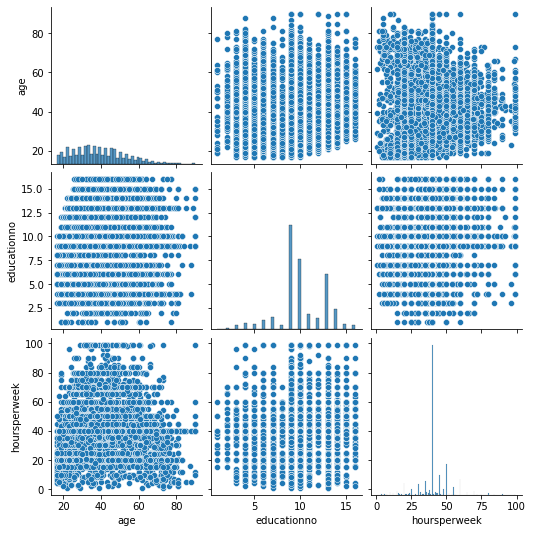

In [54]:
#Plotting of the data
import seaborn as sns
sns.pairplot(test)

In [55]:
# Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [57]:
test['workclass'] = labelencoder.fit_transform(test['workclass'])
test['education'] = labelencoder.fit_transform(test['education'])
test['occupation'] = labelencoder.fit_transform(test['occupation'])
test['sex'] = labelencoder.fit_transform(test['sex'])
test['native'] = labelencoder.fit_transform(test['native'])
test['Salary'] = labelencoder.fit_transform(test['Salary'])

In [58]:
test

,age,workclass,education,educationno,occupation,sex,hoursperweek,native,Salary
0,25,2,1,7,6,1,40,37,0
1,38,2,11,9,4,1,50,37,0
2,28,1,7,12,10,1,40,37,1
3,44,2,15,10,6,1,40,37,1
4,34,2,0,6,7,1,30,37,0
...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,9,1,40,37,0
15056,39,2,9,13,9,0,36,37,0
15057,38,2,9,13,9,1,50,37,0
15058,44,2,9,13,0,1,40,37,0


In [59]:
# Correlation of the dataset

In [60]:
test.corr()

,age,workclass,education,educationno,occupation,sex,hoursperweek,native,Salary
age,1.000000,0.092686,-0.004167,0.021979,-0.003881,0.075150,0.088090,0.001787,0.216703
workclass,0.092686,1.000000,0.021149,0.047708,0.020147,0.062290,0.051189,-0.000432,0.011495
education,-0.004167,0.021149,1.000000,0.361666,-0.017227,-0.027574,0.064155,0.075685,0.092476
educationno,0.021979,0.047708,0.361666,1.000000,0.093437,0.000603,0.127779,0.099699,0.326777
occupation,-0.003881,0.020147,-0.017227,0.093437,1.000000,0.050982,0.014548,0.003006,0.046633
sex,0.075150,0.062290,-0.027574,0.000603,0.050982,1.000000,0.227884,-0.017165,0.212100
hoursperweek,0.088090,0.051189,0.064155,0.127779,0.014548,0.227884,1.000000,0.008654,0.219184
native,0.001787,-0.000432,0.075685,0.099699,0.003006,-0.017165,0.008654,1.000000,0.016104
Salary,0.216703,0.011495,0.092476,0.326777,0.046633,0.212100,0.219184,0.016104,1.000000


**PLOTTING GRAPHS**

**BAR GRAPHS**

WORK CLASS

<Axes: >

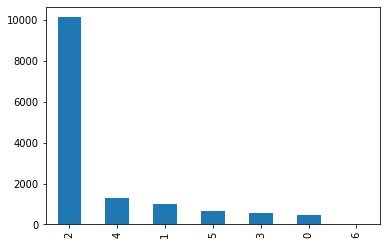

In [70]:
test['workclass'].value_counts().plot(kind='bar')

Here 2 indicates Private class.
So,the dataset contains most of the Salary details of Private Employees.

Sex

<Axes: >

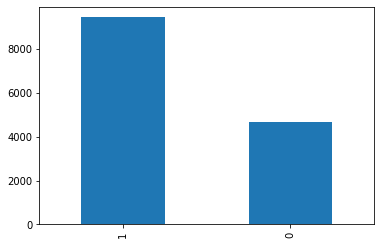

In [71]:
test['sex'].value_counts().plot(kind='bar')

This indicates that the dataset indicates most of the Salary details of men are being recorded in this dataset.

OCCUPATION

<Axes: >

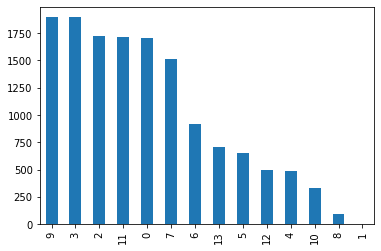

In [72]:
test['occupation'].value_counts().plot(kind='bar')

We see that the dataset has the Prof-specialty and 	Exec-managerial are the most done occupation by the Employees.

**PIE CHART**

**Native**

<Axes: ylabel='native'>

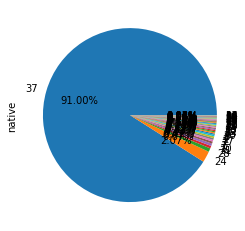

In [75]:
test['native'].value_counts().plot(kind='pie',autopct='%1.2f%%')

37 Indicates the dataset contains most of the salary details of the residents of **United States**.

**EDUCATION**

<Axes: ylabel='education'>

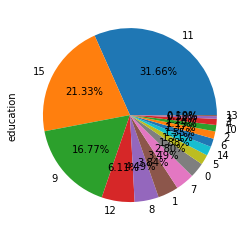

In [76]:
test['education'].value_counts().plot(kind='pie',autopct='%1.2f%%')

11 in this pie chart indicates **HS grads **are more compared to other levels of education done by the employees.

**OCCUPATION**

<Axes: ylabel='occupation'>

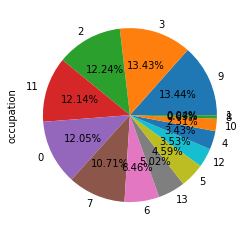

In [77]:
test['occupation'].value_counts().plot(kind='pie',autopct='%1.2f%%')

We see that the dataset has the **Prof-specialty** and **	Exec-managerial** are the most done occupation by the Employees.

**SVM**

In [61]:
# splitting train and test dataset.

In [62]:
x_train = train.iloc[:,0:8]
y_train = train.iloc[:,-1]

In [63]:
x_test = test.iloc[:,0:8]
y_test = test.iloc[:,-1]

In [64]:
# Shape of the train and test splits

In [65]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((26903, 8), (14130, 8), (26903,), (14130,))

Model Selection Using Kernel Techniques

Linear Model

In [81]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",round(metrics.accuracy_score(y_test, pred_test_linear)*100,2),'%')

Accuracy: 79.21 %


RBF

In [80]:
model_RBF = SVC(kernel = "rbf")
model_RBF.fit(x_train,y_train)
pred_test_RBF = model_RBF.predict(x_test)
print("Accuracy:",round(metrics.accuracy_score(y_test, pred_test_RBF)*100,2),'%')

Accuracy: 79.21 %


SIGMOID

In [83]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",round(metrics.accuracy_score(y_test, pred_test_sigmoid)*100,2),'%')

Accuracy: 71.07 %


Poly method

In [84]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",round(metrics.accuracy_score(y_test, pred_test_poly)*100,2),'%')

Accuracy: 79.57 %


**Inference**

From above Kernel techniques , we conclude that Poly method has a better accuracy when compared to other Kernel techniques.

Therefore,the Best model that fits this dataset is **Poly** with an accuracy of nearly 80%, which seems to be good.